# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [76]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')

# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [31]:
bins = [sinasc_raw['munResLat'].min(),-10.5,sinasc_raw['munResLat'].max()]
latitude = pd.cut(sinasc_raw['munResLat'], bins=bins, labels=['Abaixo de -10.5', 'Acima de -10.5'])
sinasc_raw.groupby(latitude)[['QTDPARTNOR','QTDPARTCES']].agg(['sum','mean','min','max','median','std','var'])

QTDPARTNOR                                                  \
                       sum      mean  min   max median       std       var   
munResLat                                                                    
Abaixo de -10.5     5782.0  0.453668  0.0  41.0    0.0  1.125619  1.267019   
Acima de -10.5      8771.0  0.711759  0.0  40.0    0.0  1.279042  1.635949   

                QTDPARTCES                                                  
                       sum      mean  min   max median       std       var  
munResLat                                                                   
Abaixo de -10.5     7052.0  0.552665  0.0  12.0    0.0  0.753007  0.567020  
Acima de -10.5      6041.0  0.487335  0.0  12.0    0.0  0.737899  0.544495

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [27]:
bins = [sinasc_raw['munResArea'].min(),3000,sinasc_raw['munResArea'].max()]
area_residencial = pd.cut(sinasc_raw['munResArea'], bins=bins, labels=['Abaixo de 3000', 'Acima de 3000'])
sinasc_raw.groupby(area_residencial)[['QTDPARTNOR','QTDPARTCES']].agg(['sum','mean','min','max','median','std','var'])

QTDPARTNOR                                                  \
                      sum      mean  min   max median       std       var   
munResArea                                                                  
Abaixo de 3000     1898.0  0.373255  0.0  10.0    0.0  0.856498  0.733588   
Acima de 3000     12659.0  0.632982  0.0  41.0    0.0  1.278932  1.635668   

               QTDPARTCES                                                  
                      sum      mean  min   max median       std       var  
munResArea                                                                 
Abaixo de 3000     2910.0  0.571934  0.0   5.0    0.0  0.748719  0.560580  
Acima de 3000     10184.0  0.507070  0.0  12.0    0.0  0.744981  0.554997

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [41]:
mediana = sinasc_raw["munResAlt"].median()
bins = [sinasc_raw['munResAlt'].min(),mediana,sinasc_raw['munResAlt'].max()]
mun_res_alt = pd.cut(sinasc_raw['munResAlt'], bins=bins, labels=[f'Abaixo de {mediana}', f'Acima de {mediana}'])
sinasc_raw.groupby(mun_res_alt)[['QTDPARTNOR','QTDPARTCES']].agg(['sum','mean','min','max','median','std','var'])

QTDPARTNOR                                                  \
                       sum      mean  min   max median       std       var   
munResAlt                                                                    
Abaixo de 153.0     8999.0  0.773974  0.0  40.0    0.0  1.357675  1.843283   
Acima de 153.0      5264.0  0.398064  0.0  41.0    0.0  1.018270  1.036874   

                QTDPARTCES                                                  
                       sum      mean  min   max median       std       var  
munResAlt                                                                   
Abaixo de 153.0     5558.0  0.475490  0.0  12.0    0.0  0.736807  0.542884  
Acima de 153.0      7439.0  0.561519  0.0  12.0    0.0  0.752433  0.566156

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia
https://pt.wikipedia.org/wiki/Lista_de_regi%C3%B5es_geogr%C3%A1ficas_intermedi%C3%A1rias_e_imediatas_de_Rond%C3%B4nia

<Axes: xlabel='mes'>

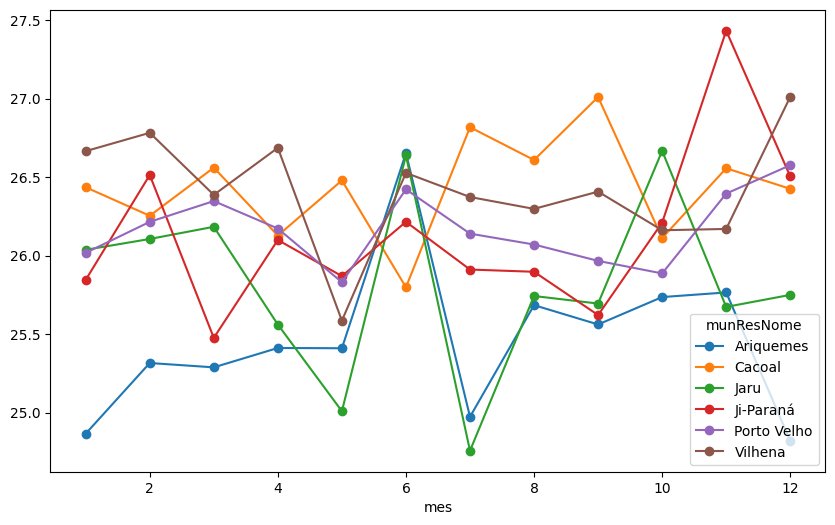

In [75]:
imediatas = {
"Candeias do Jamari":"Porto Velho",
"Guajará-Mirim":"Porto Velho",
"Itapuã do Oeste":"Porto Velho",
"Nova Mamoré":"Porto Velho",
"Porto Velho":"Porto Velho",
"Alto Paraíso":"Ariquemes",
"Ariquemes":"Ariquemes",
"Buritis":"Ariquemes",
"Cacaulândia":"Ariquemes",
"Campo Novo de Rondônia":"Ariquemes",
"Cujubim":"Ariquemes",
"Monte Negro":"Ariquemes",
"Rio Crespo":"Ariquemes",
"Governador Jorge Teixeira":"Jaru",
"Jaru":"Jaru",
"Machadinho d'Oeste":"Jaru",
"Theobroma":"Jaru",
"Vale do Anari":"Jaru",
"Alvorada d'Oeste":"Ji-Paraná",
"Costa Marques":"Ji-Paraná",
"Ji-Paraná":"Ji-Paraná",
"Mirante da Serra":"Ji-Paraná",
"Nova União":"Ji-Paraná",
"Ouro Preto do Oeste":"Ji-Paraná",
"Presidente Médici":"Ji-Paraná",
"São Francisco do Guaporé":"Ji-Paraná",
"São Miguel do Guaporé":"Ji-Paraná",
"Seringueiras":"Ji-Paraná",
"Teixeirópolis":"Ji-Paraná",
"Urupá":"Ji-Paraná",
"Vale do Paraíso":"Ji-Paraná",
"Alta Floresta d'Oeste":"Cacoal",
"Alto Alegre dos Parecis":"Cacoal",
"Cacoal":"Cacoal",
"Castanheiras":"Cacoal",
"Espigão d'Oeste":"Cacoal",
"Ministro Andreazza":"Cacoal",
"Nova Brasilândia d'Oeste":"Cacoal",
"Novo Horizonte do Oeste":"Cacoal",
"Parecis":"Cacoal",
"Pimenta Bueno":"Cacoal",
"Primavera de Rondônia":"Cacoal",
"Rolim de Moura":"Cacoal",
"Santa Luzia d'Oeste":"Cacoal",
"São Felipe d'Oeste":"Cacoal",
"Cabixi":"Vilhena",
"Cerejeiras":"Vilhena",
"Chupinguaia":"Vilhena",
"Colorado do Oeste":"Vilhena",
"Corumbiara":"Vilhena",
"Pimenteiras do Oeste":"Vilhena",
"Vilhena":"Vilhena"
}

sinasc_2 = sinasc_raw.set_index('munResNome')
sinasc_2['mes'] = pd.to_datetime(sinasc_2['DTNASC']).dt.month
media_idade_ano = sinasc_2.groupby(['mes',imediatas])['IDADEMAE'].mean().unstack()
media_idade_ano.plot(kind='line', marker='o', figsize=(10, 6))


### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [103]:
idh = pd.read_csv('dados_extras_ro.csv',encoding='latin-1',sep=';')
idh.rename(columns={'municipio':'munResNome'}, inplace=True)
df = sinasc_raw.merge(idh, how='left', on='munResNome')
bins = [0.0,0.500,0.600,0.700,0.800,1000]
cat_idh = pd.cut(df['idh'], bins=bins, labels=['IDH muito baixo', 'IDH baixo', 'IDH médio', 'IDH alto', 'IDH muito alto'])
idade_mae = pd.cut(df['IDADEMAE'], [0, 18, 23, 28, 33, 38, 43, 48, 53, 58,80])
df.groupby([cat_idh,idade_mae])['IDADEMAE'].count()

idh              IDADEMAE
IDH muito baixo  (0, 18]        0
                 (18, 23]       0
                 (23, 28]       0
                 (28, 33]       0
                 (33, 38]       0
                 (38, 43]       0
                 (43, 48]       0
                 (48, 53]       0
                 (53, 58]       0
                 (58, 80]       0
IDH baixo        (0, 18]      249
                 (18, 23]     532
                 (23, 28]     515
                 (28, 33]     315
                 (33, 38]     171
                 (38, 43]      41
                 (43, 48]       3
                 (48, 53]       0
                 (53, 58]       0
                 (58, 80]       0
IDH médio        (0, 18]     1128
                 (18, 23]    2541
                 (23, 28]    2488
                 (28, 33]    1839
                 (33, 38]     990
                 (38, 43]     266
                 (43, 48]      17
                 (48, 53]       4
                 (53, 

### 5.2 IFDM 
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [105]:
bins = [0.0,0.4,0.6,0.8,1.0]
cat_ifdm = pd.cut(df['ifdm'], bins=bins, labels=['Baixo', 'Regular', 'Moderado', 'Alto'])
df.groupby([cat_ifdm,idade_mae])['IDADEMAE'].count()

ifdm      IDADEMAE
Baixo     (0, 18]        0
          (18, 23]       0
          (23, 28]       0
          (28, 33]       0
          (33, 38]       0
          (38, 43]       0
          (43, 48]       0
          (48, 53]       0
          (53, 58]       0
          (58, 80]       0
Regular   (0, 18]      695
          (18, 23]    1464
          (23, 28]    1342
          (28, 33]     922
          (33, 38]     510
          (38, 43]     137
          (43, 48]       9
          (48, 53]       2
          (53, 58]       0
          (58, 80]       0
Moderado  (0, 18]     2511
          (18, 23]    5718
          (23, 28]    5949
          (28, 33]    4513
          (33, 38]    2528
          (38, 43]     681
          (43, 48]      44
          (48, 53]       2
          (53, 58]       0
          (58, 80]       0
Alto      (0, 18]        0
          (18, 23]       0
          (23, 28]       0
          (28, 33]       0
          (33, 38]       0
          (38, 43]       0
         

### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [120]:
bins = [0,100000,200000,300000,500000,1000000,float('inf')]
cat_pib = pd.cut(df['pib'], bins=bins, labels=['Até 100 Milhões', 'Acima de 100 milhões', 'Acima de 200 milhões', 'Acima de 300 milhões','Acima de 500 milhões','Acima de 1 Bilhão'])
df.groupby(cat_pib)[['QTDPARTNOR','QTDPARTCES']].count()

,QTDPARTNOR,QTDPARTCES
pib,,
Até 100 Milhões,427,426
Acima de 100 milhões,1914,1913
Acima de 200 milhões,644,669
Acima de 300 milhões,1859,1857
Acima de 500 milhões,3844,3931
Acima de 1 Bilhão,16460,16440


### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.

### ANÁLISE
Após o merge das bases de dados com os valores do IDH-M, IFDM e PIB foi realizada uma análise utilizando as váriáveis 'IDADEMAE', 'QTDPARTNOR', 'QTDPARTCES'. Desta análise podemos destacar que a categorização do índice IDH e IFDM em cruzamento com a váriável idade da mãe obtive a percepção de que a maior quantidade está entre IDH Alto e IFDM Moderado e a faixa de idade está entre 18 e 28 anos. Já referente ao PIB podemos perceber que a quantidade de partos normais e cesária não tem relação direta com o PIB que a diferença entre uma variável e outra entre as faixas do PIB tem uma variação muito baixa.
